# Sentiment Analysis



#### 1. Data Analysis & Preprocessing
                                            

###### To import & understand the Dataset 

In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'E:/DataScience&AI/DataScience/Projects/Sentiment Analysis/data/Reviews.csv')
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [35]:
df['reviews.rating']

0       5.0
1       5.0
2       4.0
3       5.0
4       5.0
       ... 
1592    3.0
1593    1.0
1594    1.0
1595    3.0
1596    1.0
Name: reviews.rating, Length: 1597, dtype: float64

##

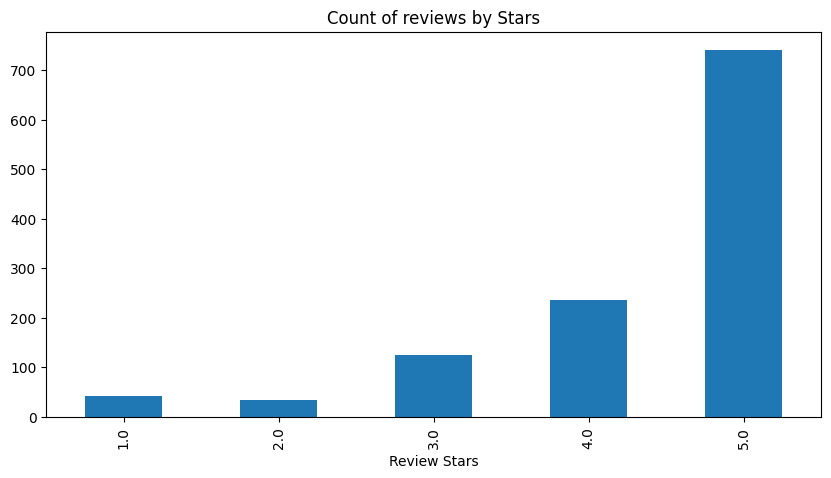

In [38]:
axis = df['reviews.rating'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by Stars',figsize=(10,5))
axis.set_xlabel('Review Stars')
plt.show()

##

In [6]:
Text = df['reviews.text'][20]
print(Text)

Almost like reading a real book. Don't is crisp, sharp and easy to read. I've held out from buying a reader for years because I could never quite get past the fact it wasn't a book. With this new kindle I don't even notice, I am immediately immersed. Wildly better than I expected.


######

###### Convert Rating to Sentiment


In [8]:

def rating_to_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['reviews.rating'].apply(rating_to_sentiment)
print(df[['reviews.rating', 'sentiment']].head())


   reviews.rating sentiment
0             5.0  positive
1             5.0  positive
2             4.0  positive
3             5.0  positive
4             5.0  positive


######

###### Plot for Distribution of Sentiment Labels

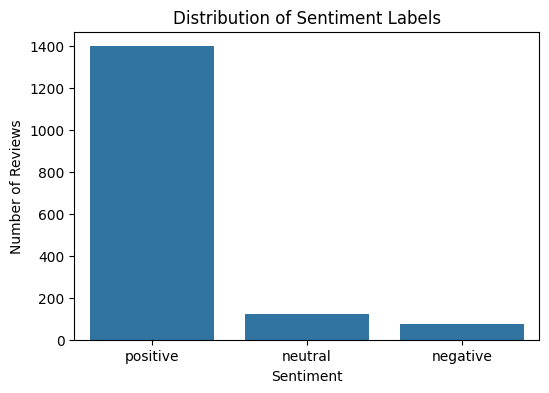

In [21]:

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

######

###### Clean the review text

In [10]:

import re

def clean_text(text):
    text = str(text).lower()              
    text = re.sub(r'[^a-z\s]', '', text)  
    return text

df['cleaned_review'] = df['reviews.text'].apply(clean_text)
print(df[['reviews.text', 'cleaned_review']].head())


                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                      cleaned_review  
0  i initially had trouble deciding between the p...  
1  allow me to preface this with a little history...  
2  i am enjoying it so far great for reading had ...  
3  i bought one of the first paperwhites and have...  
4  i have to say upfront  i dont like coroporate ...  


######

###### Prepare Features and Labels

In [11]:

X = df['cleaned_review']
y = df['sentiment']


###### Convert Text to Numbers (TF-IDF)

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)


###### Split Data into Train and Test

In [14]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 2. ML Algorithms Used for Training

###### Logistic Regression

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced')

logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))


Accuracy (Logistic Regression): 0.84375


######

###### Naive Bayes 

In [16]:

from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))




Accuracy: 0.884375


######

###### Support Vector Machine (SVM)

In [17]:

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Accuracy: 0.884375


######

###### Random Forest 

In [18]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Accuracy: 0.9


######

#### 3. Prediction & Analysis

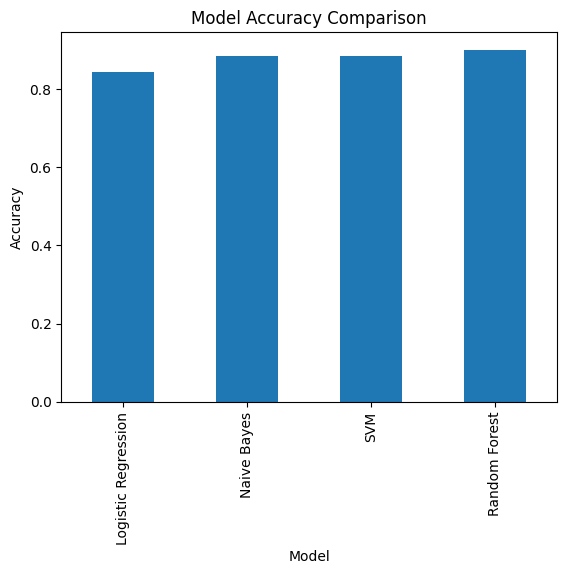

In [20]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_rf)]
})

results.plot(kind='bar', x='Model', y='Accuracy', legend=False, title='Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
